In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**There are no categorical variables, all are numerical. So there is no need of applying encoding techniques.**

In [6]:
df.shape

(214, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


**No null values are in the dataset, so there is no necessary of imputation or removal of features or the data.**

<Axes: >

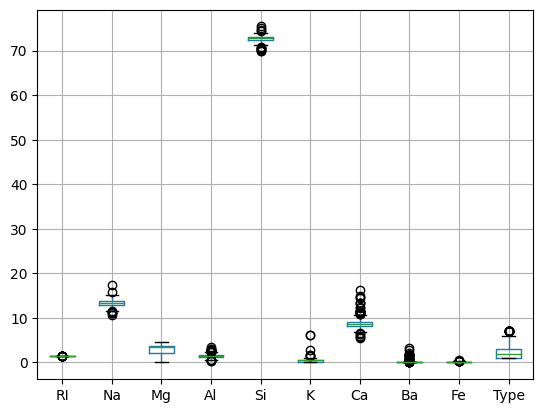

In [10]:
df.boxplot()

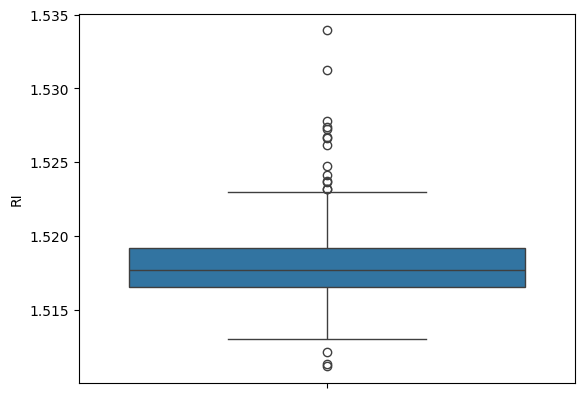

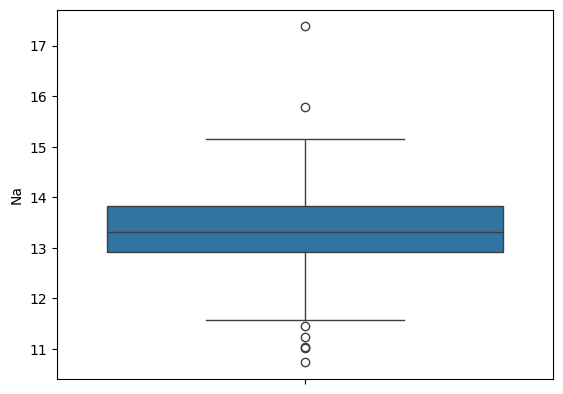

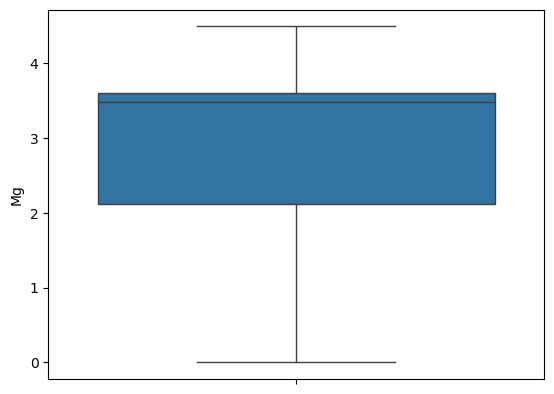

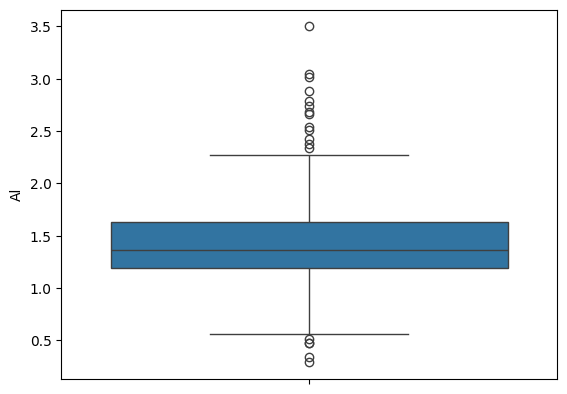

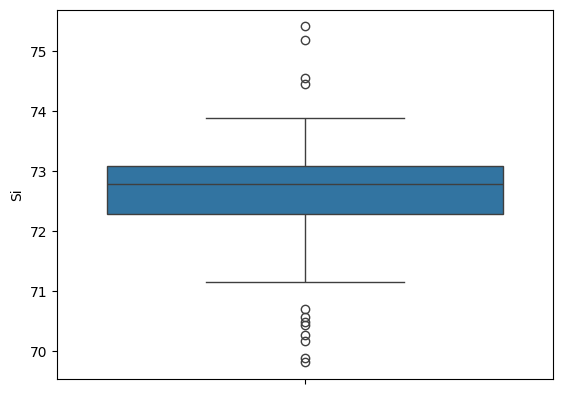

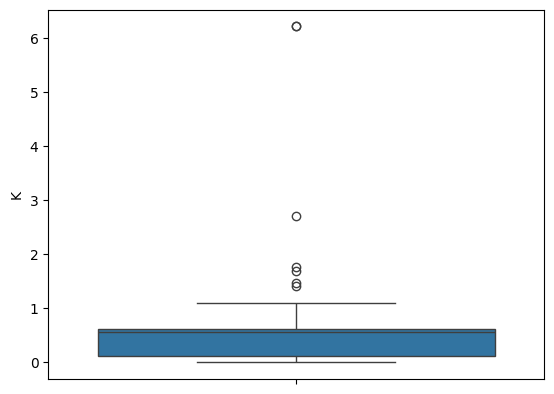

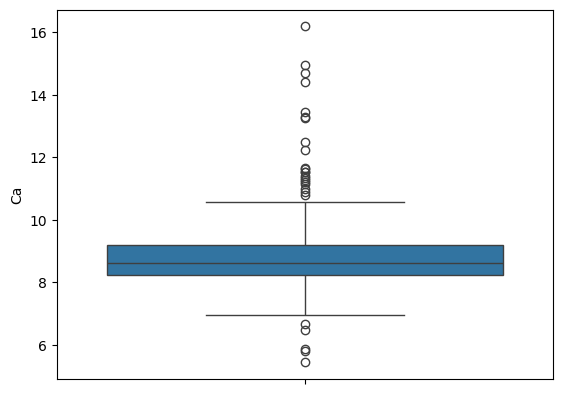

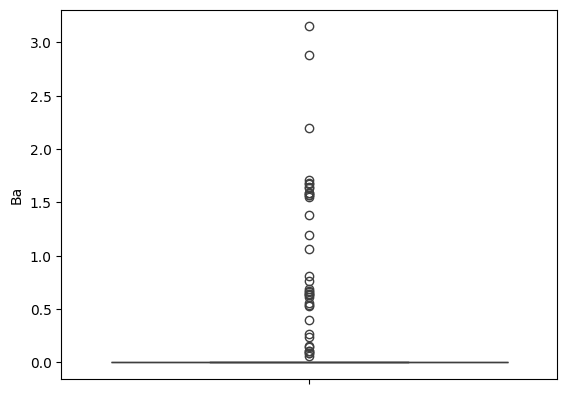

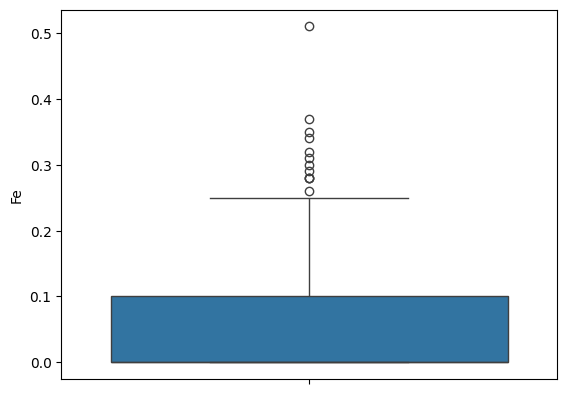

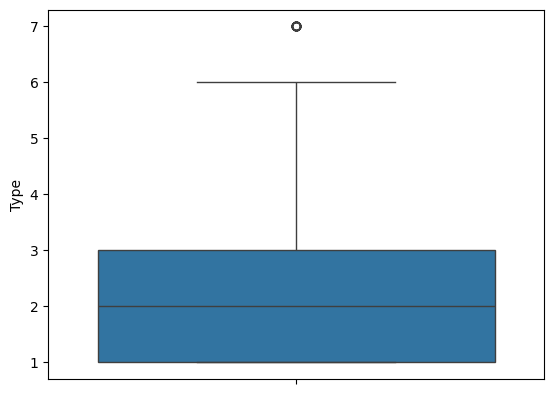

In [11]:
for cols in df.select_dtypes(include=np.number):
  sns.boxplot(df[cols])
  plt.show()

In [12]:
num_cols = df.columns[:-1]

def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col].count()
    return outliers

# Detecting outliers in numerical columns
outliers_detected = detect_outliers_iqr(df, num_cols)

outliers_detected

{'RI': 17,
 'Na': 7,
 'Mg': 0,
 'Al': 18,
 'Si': 12,
 'K': 7,
 'Ca': 26,
 'Ba': 38,
 'Fe': 12}

**Since Random Forest is a robust to outliers which relies on decision trees so the values are not affected extreamly.**

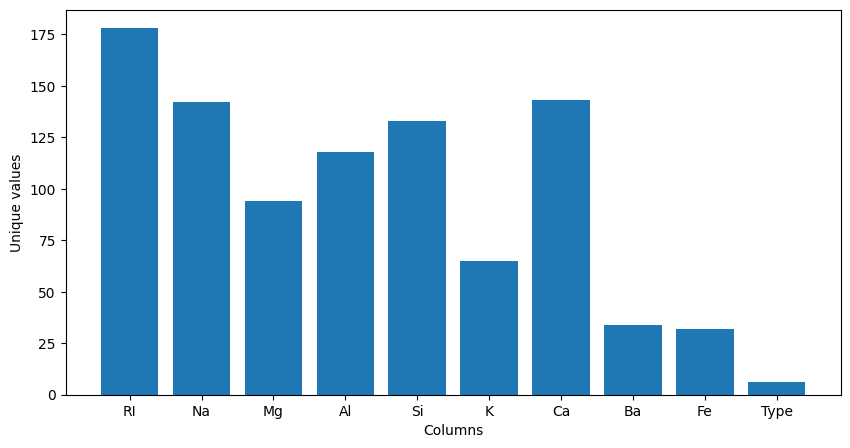

In [13]:
plt.figure(figsize=(10,5))
plt.bar(df.columns, df.nunique())
plt.xlabel("Columns")
plt.ylabel("Unique values")
plt.show()

**From the above Bar graph we infer the number of unique values in the variables.**

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

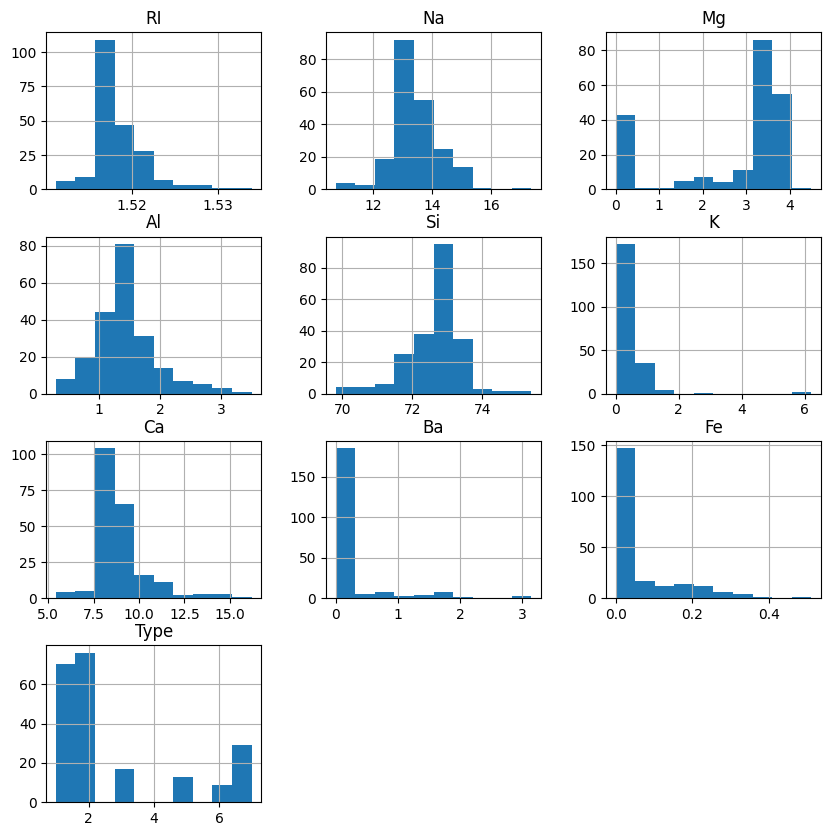

In [14]:
df.hist(figsize=(10,10))

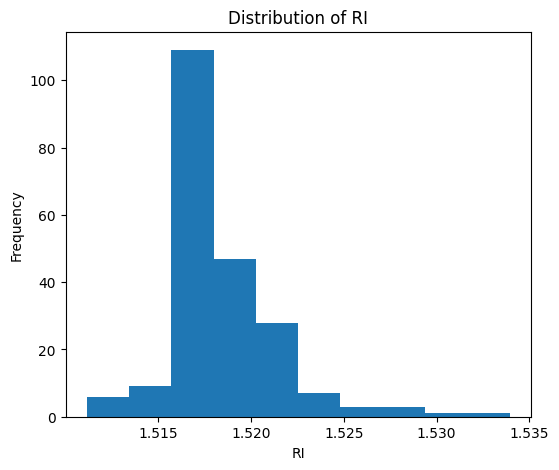

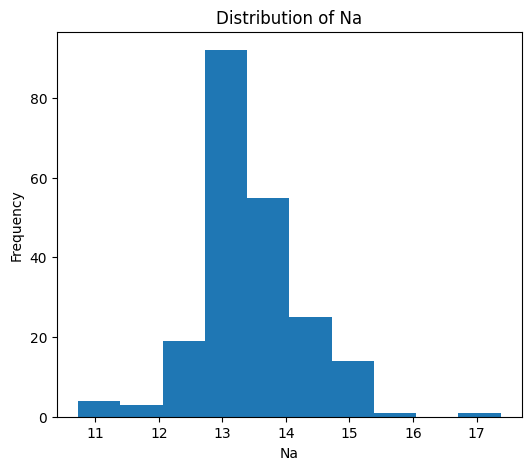

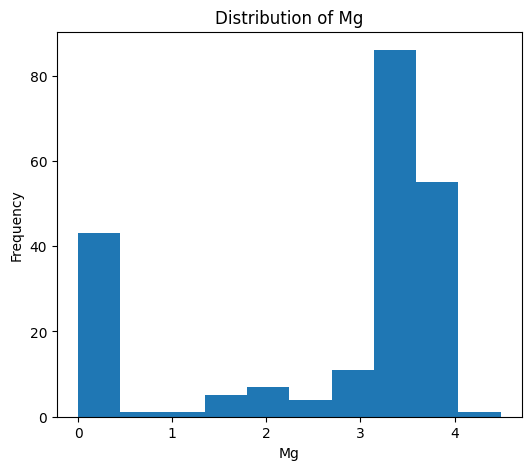

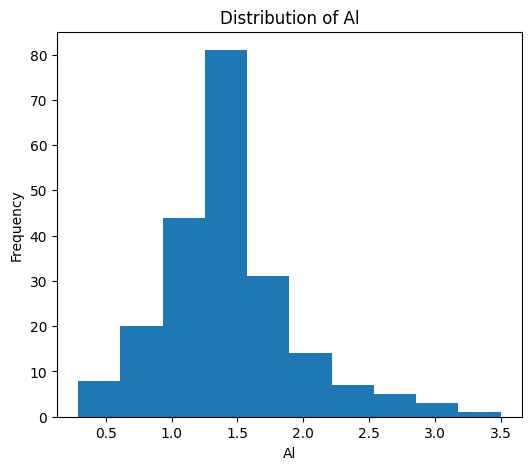

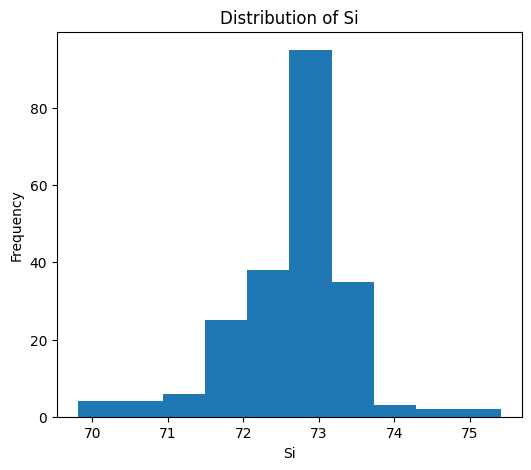

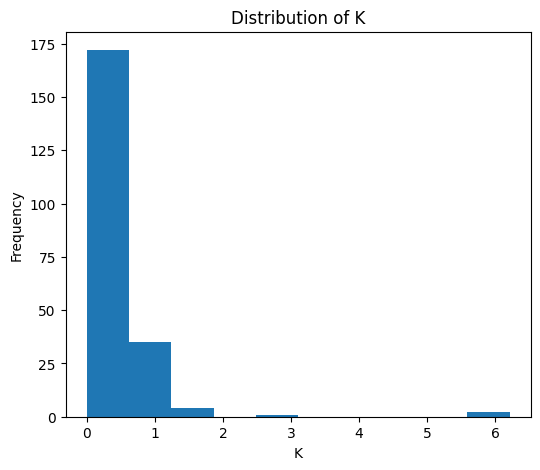

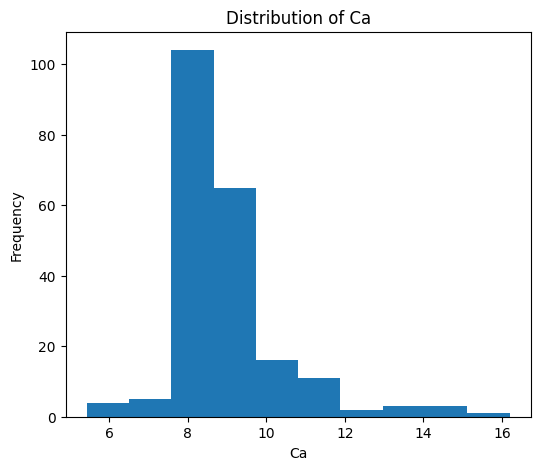

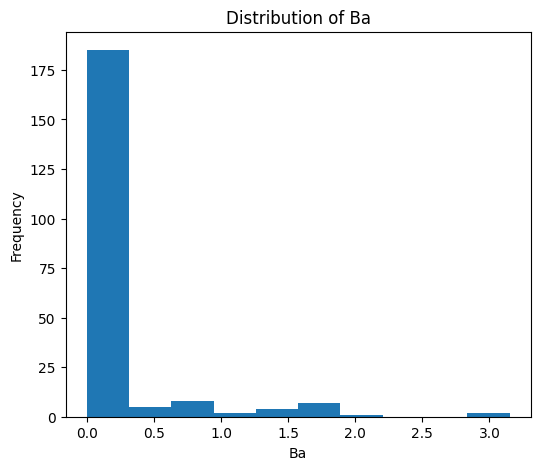

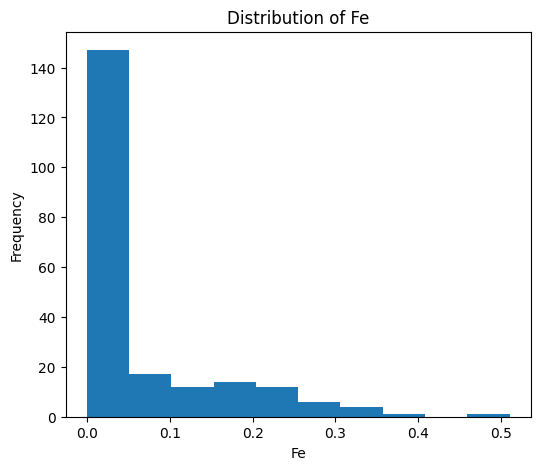

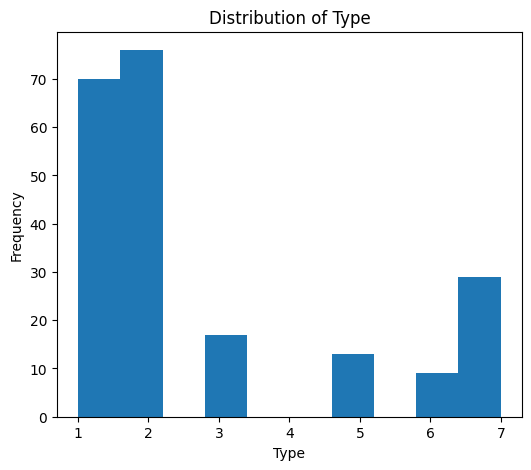

In [15]:
for cols in df.select_dtypes(include=np.number):
  plt.figure(figsize=(6,5))
  plt.hist(df[cols])
  plt.xlabel(cols)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {cols}")
  plt.show()

<ipython-input-16-2f41f810e095>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols1])


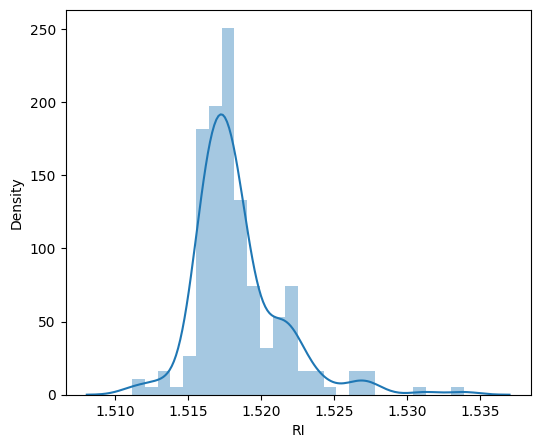

<ipython-input-16-2f41f810e095>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols1])


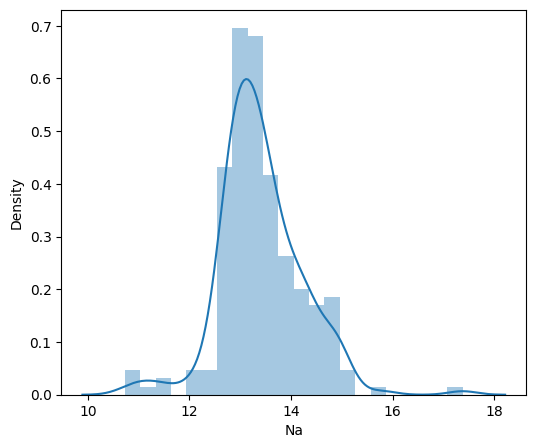

<ipython-input-16-2f41f810e095>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols1])


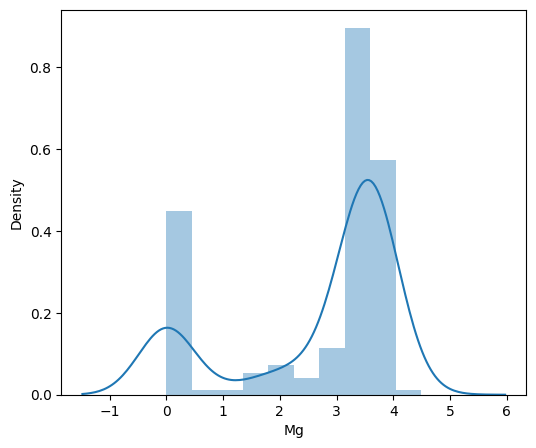

<ipython-input-16-2f41f810e095>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols1])


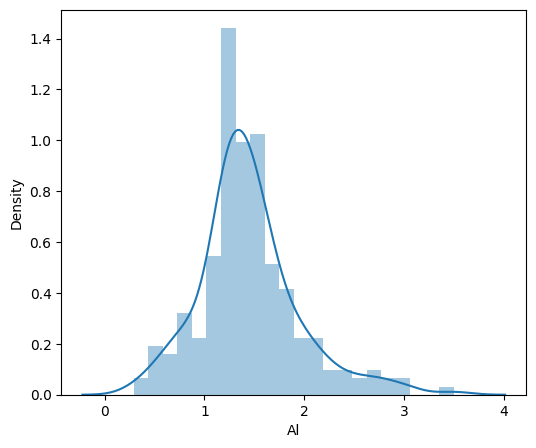

<ipython-input-16-2f41f810e095>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols1])


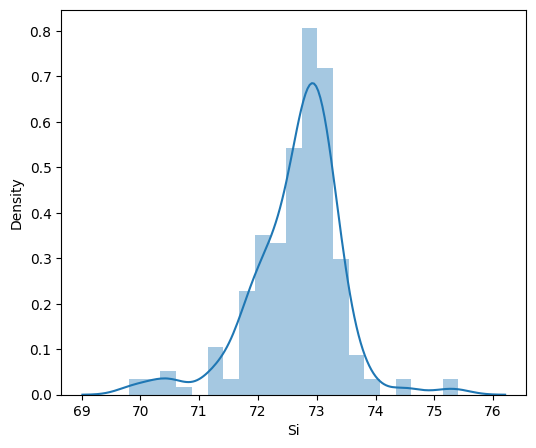

<ipython-input-16-2f41f810e095>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols1])


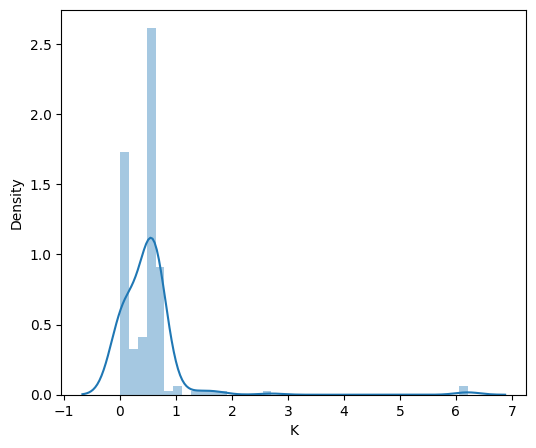

<ipython-input-16-2f41f810e095>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols1])


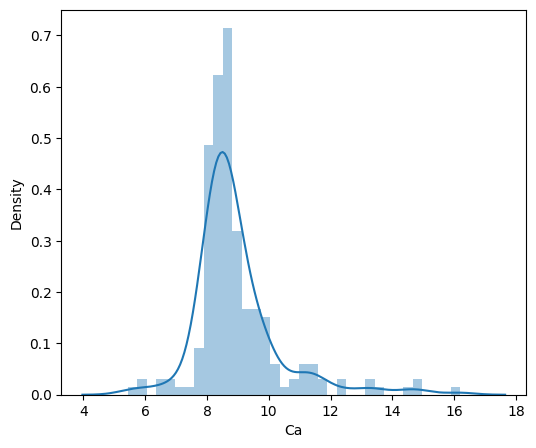

<ipython-input-16-2f41f810e095>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols1])


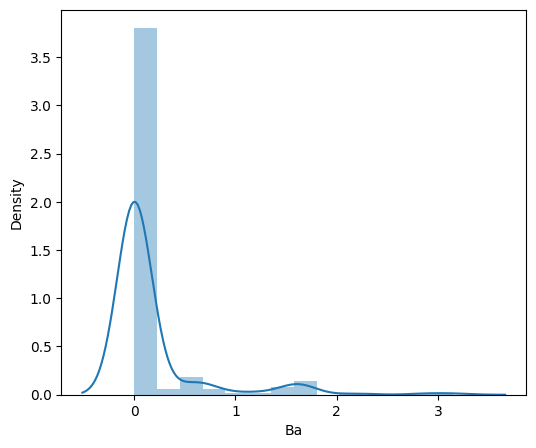

<ipython-input-16-2f41f810e095>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols1])


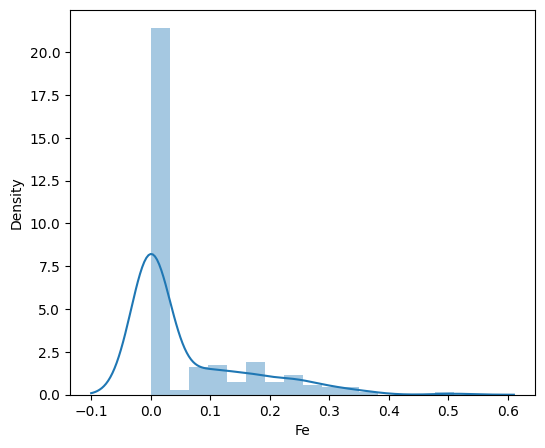

<ipython-input-16-2f41f810e095>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols1])


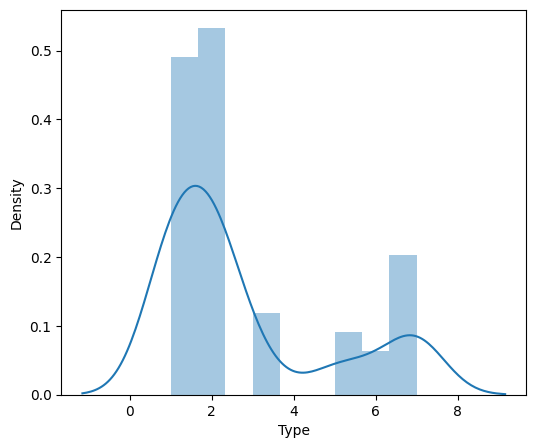

In [16]:
for cols1 in df.select_dtypes(include=np.number):
  plt.figure(figsize=(6,5))
  sns.distplot(df[cols1])
  plt.show()

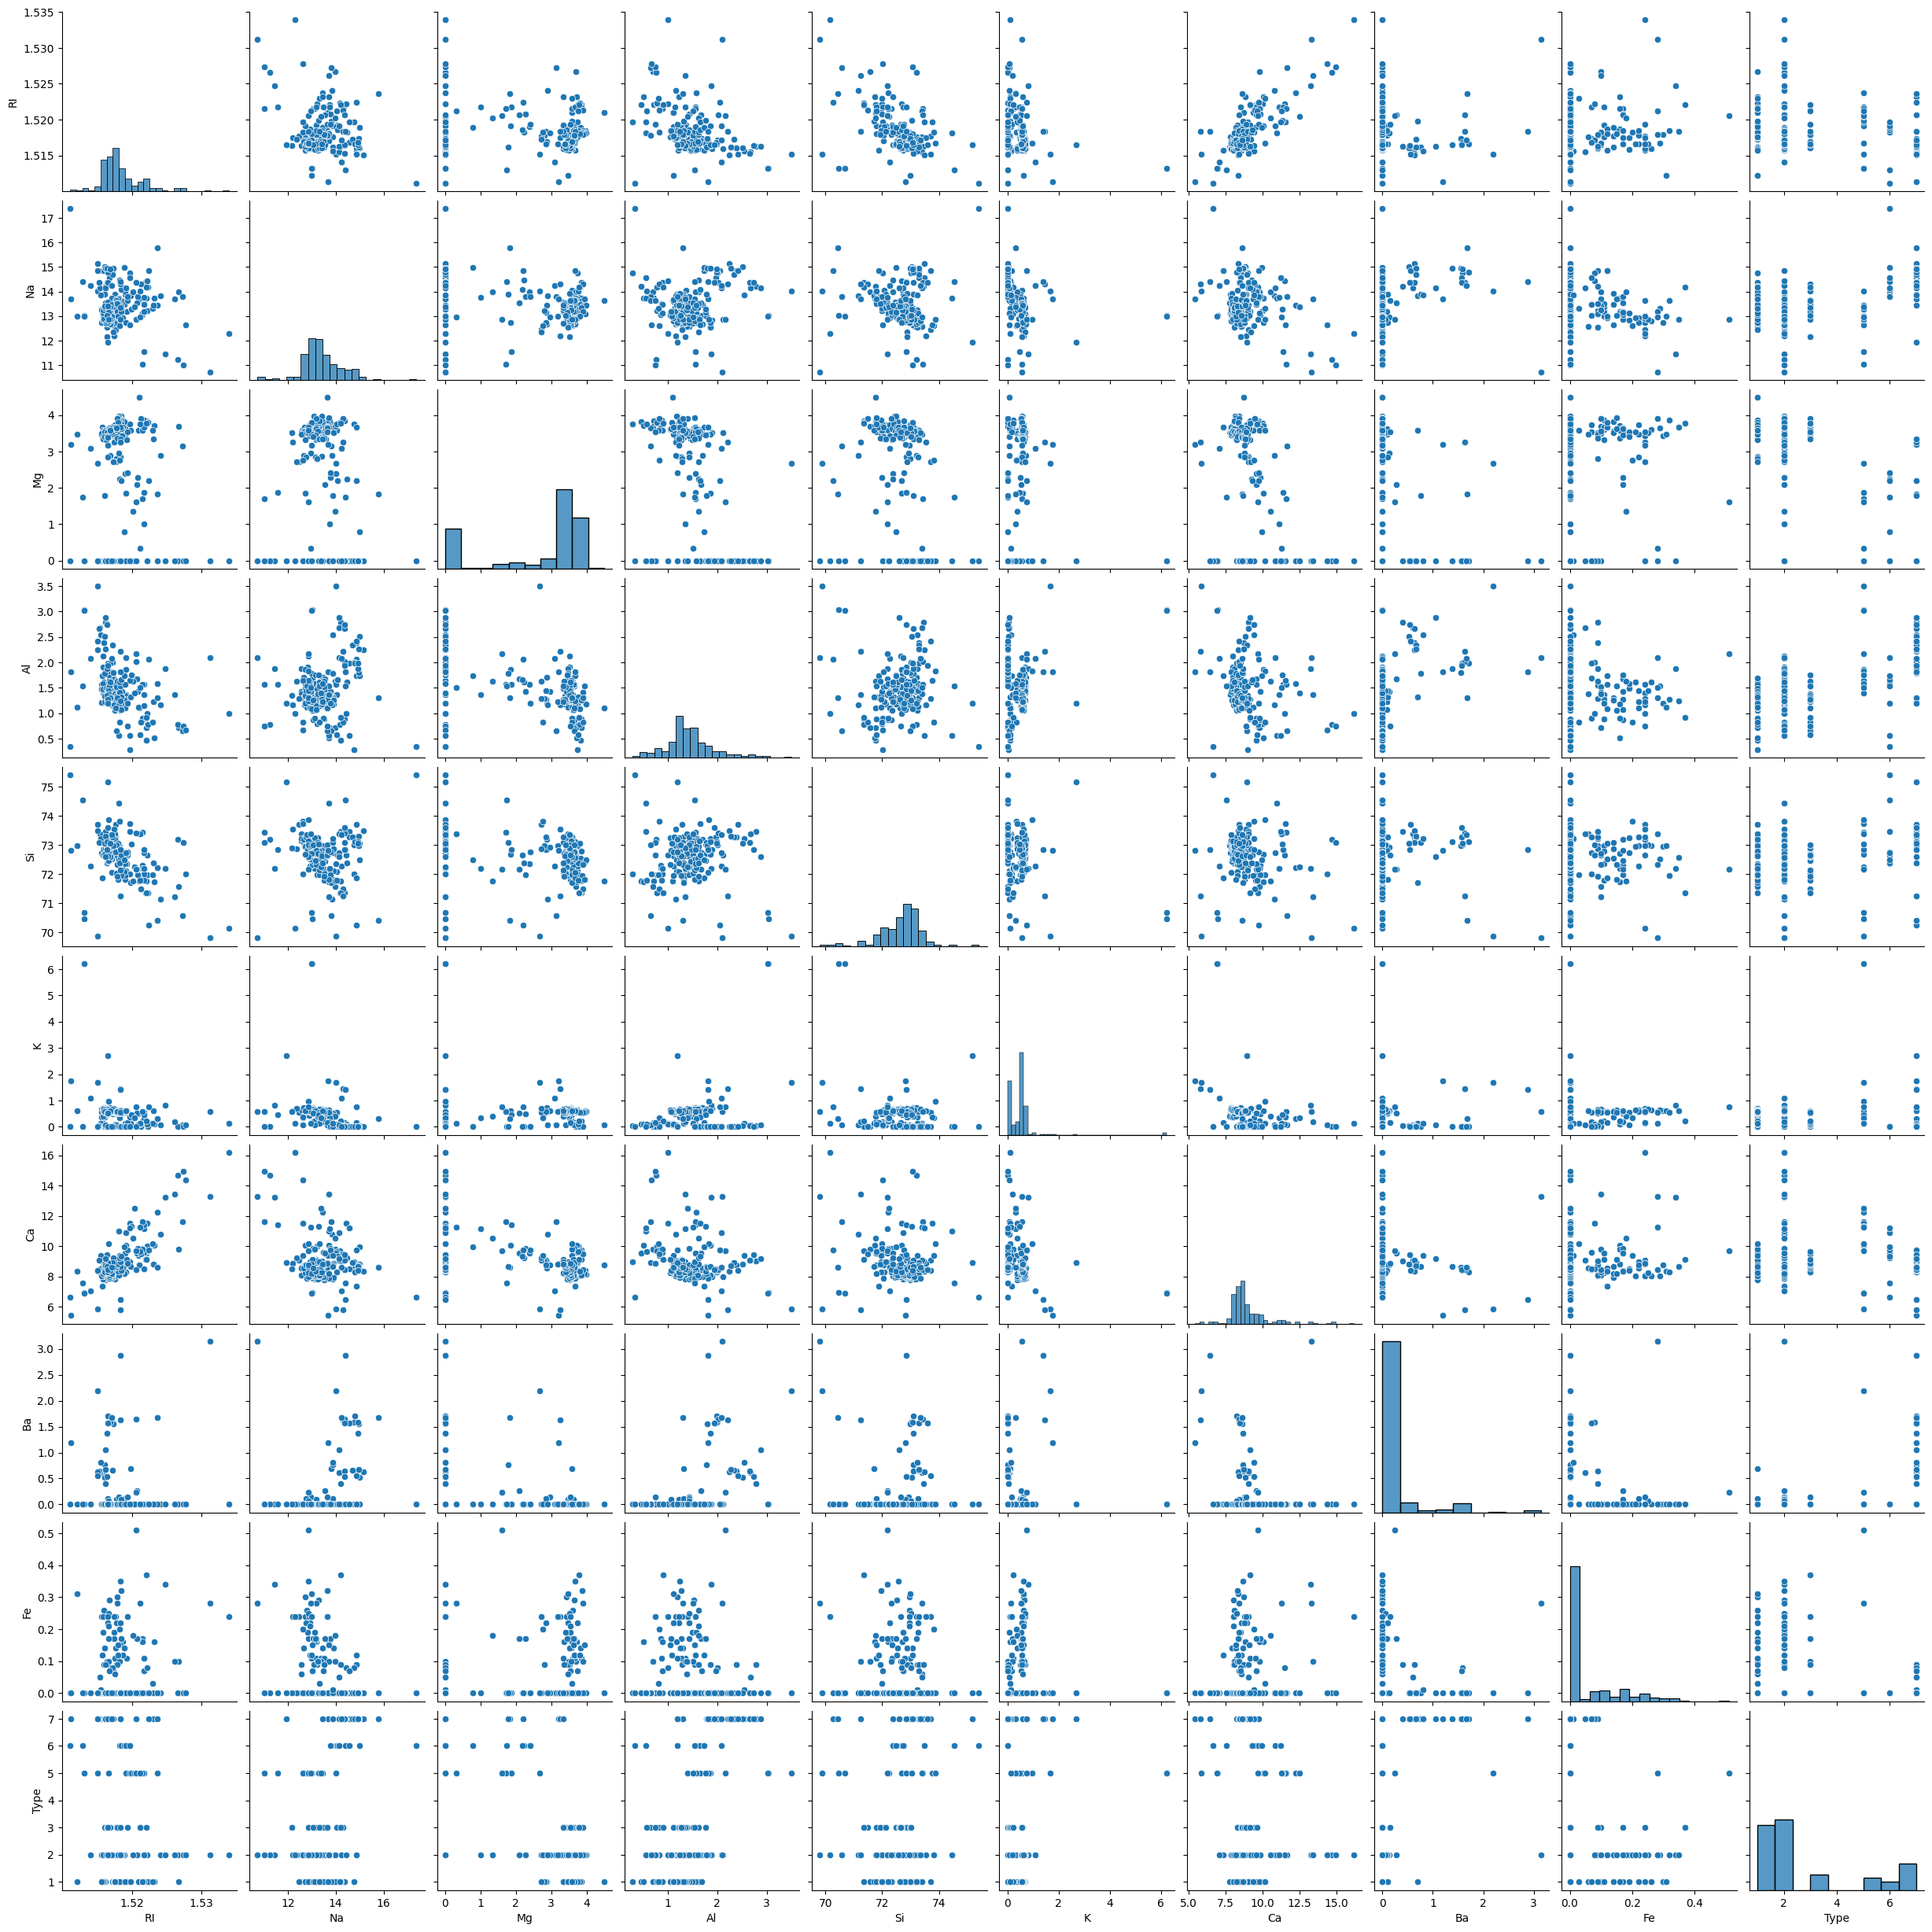

In [17]:
sns.pairplot(df)

In [18]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


**We can see the correlation from the above table and to be more understanable, from the below heatmap visualization we can read the correlation of the each variables how they are correlated to eachother.**

<Axes: >

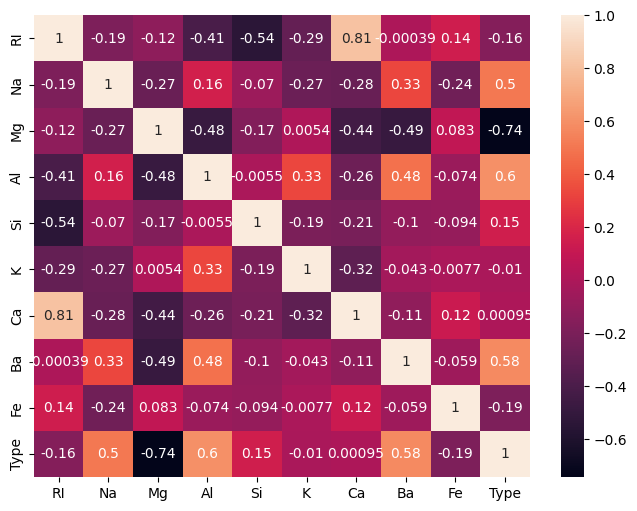

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

**Since we are performing the Random Forest classification, there is no need to scale the values. Because random forests are tree-based models, which are insensitive to the scale of the features. Anyway we try to scale down the values of the varibles excluding the target varibale (Type).**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
numcols = df.columns[:-1]

scaler = StandardScaler()
df[numcols] = scaler.fit_transform(df[numcols])

In [22]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


In [23]:
x = df.drop("Type", axis=1)
y = df["Type"]

**We try to split the data 80% for training and 20% for testing.**

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

After splitting the data, We try to build the model. We try to pass the parameters such as n_jobs, n_estimators, oob_score and random_state.

Where **random_state** controls the randomness of bootstapping of samples.

**n_jobs** tells the engine how many processors are allowed to use, since we have given -1 means there is no restriction.

**n_estimators** specifies the number of trees in the forest of the model.

**oob_score** enables or disables the out-of-bag samples to
estimate the accuracy.

In [44]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, oob_score=True)

In [45]:
model1.fit(x,y)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [46]:
model1.oob_score_

0.794392523364486

**we got the oob_score of 0.79, suggests that the model correctly classifies approximately 79% of the data points when using the OOB samples. This is a good initial indication of the model's performance, and can be used to compare different models or tune hyperparameters.**

In [47]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, oob_score=True)

In [48]:
model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
y_pred = model.predict(x_test)

In [51]:
accuracy_score(y_test, y_pred)

0.8372093023255814

**we fot the accuracy_score of 83%.
acccuracy_score is calculated using the test set, which is a separate set of data points that were not used for training.**

In [32]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0,  0,  0,  0],
       [ 4,  9,  0,  0,  0,  1],
       [ 1,  0,  2,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  8]])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



**We apply Bagging and Boosting mathods.**

In [34]:
from sklearn.ensemble import BaggingClassifier

In [35]:
bagging_model = BaggingClassifier(random_state=42, n_jobs=-1, n_estimators=100)
bagging_model.fit(x_train, y_train)

BaggingClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [36]:
bagging_pred = bagging_model.predict(x_test)

In [37]:
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print(bagging_accuracy)

0.8604651162790697


**From the Bagging classifier model we got the accuracy score of 86%, Which is quite better than the Random Forest classifier.**

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
boosting_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
boosting_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [40]:
boosting_pred = boosting_model.predict(x_test)

In [41]:
boosting_accuracy = accuracy_score(y_test, boosting_pred)
print(boosting_accuracy)

0.8604651162790697


**Same goes with the Gradient Boosting classifier, we got the accuracy score of 86%.**

#Bagging and Boosting

Bagging and boosting are different **ensemble techniques** that use multiple models to reduce error and optimize the model.

The **bagging technique** combines multiple models trained on different subsets of data, whereas **boosting** trains the model sequentially, focusing on the error made by the previous model.

#Handling Imbalance in the data.

Handling imbalanced data is very importanat because it significantly affects the performance of the model, leading to biased predictions toward the majority class.

Techniques commonly used to handle imbalanced data:

**1.Resampling Technique:**

-> **Oversampling the Minority Class:** This involves creating synthetic samples of the minority class to balance the dataset.

-> **Undersampling the Majority Class:** Reducing the number of samples in the majority class to balance the dataset, though it risks losing valuable information.

**2.Class Weight Adjustment:**

Random Forest allows us to adjust class weights, giving higher importance to minority classes during model training. This is often a simpler and effective way to handle imbalance.

**3.BalancedBaggingClassifier:**

When dealing with imbalanced datasets, traditional classifiers tend to favor the majority class, neglecting the minority class due to its lower representation. The BalancedBaggingClassifier, an extension of sklearn classifiers, addresses this imbalance by incorporating additional balancing during training.

**4.SMOTE:**

The Synthetic Minority Oversampling Technique (SMOTE) addresses imbalanced datasets by synthetically generating new instances for the minority class.

